In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# make a list of names Q1_2020 to Q4_2025 using list comprehension
col_names =  []
for i in range(2020,2026):
    for j in range(1,5):
        col_names.append('Q'+str(j)+'_'+str(i))

In [3]:
def process_ann_data(df, commodity, subset_countries=None):
    
    if commodity == 'metals':
        years = list(range(2005, 2035))
    else:
        years = list(range(2005, 2041))

    df.columns = ['Concept', 'Import Country/Territory', 
                  'Export Country/Territory', 'Commodity',
                  'Start Date', 'End Date'] + years

    export_df, import_df = pd.DataFrame(), pd.DataFrame()
    export_df['Year'] = years
    countries = df['Export Country/Territory'].unique()
    for i, country in enumerate(countries):
        ex_frame = df.loc[(df['Export Country/Territory'] == country)]
        im_frame = df.loc[(df['Import Country/Territory'] == country)]
        ex_values = []
        im_values = []
        for j in years:
            ex_values.append(ex_frame[j].sum(skipna=True))
            im_values.append(im_frame[j].sum(skipna=True))
            
        export_df[country] = ex_values
        import_df[country] = im_values
    # export_df = pd.DataFrame(index=years, columns=df['Export Country/Territory'].unique(), 
    #                          data=df['Export Country/Territory'].sum(skipna=True))
    # import_df = pd.DataFrame(index=years, columns=df['Import Country/Territory'].unique(), 
    #                          data=df['Import Country/Territory'].sum(skipna=True))


    import_df.index = years
    export_df.index = years

    if subset_countries:
        import_df = import_df.loc[:, subset_countries]
        export_df = export_df.loc[:, subset_countries]
    
    export_zs = zscore(export_df.pct_change().iloc[1:,:], axis=0)
    export_zs = export_zs.dropna(axis=0, how='all')
    import_zs = zscore(import_df.pct_change().iloc[1:,:], axis=0)
    import_zs = import_zs.dropna(axis=0, how='all')

    return export_df, import_df, export_zs, import_zs

In [4]:
def process_qrterly_data(df, subset_countries=None):
    
    years = col_names
    df.columns = ['Import Country/Territory', 
                  'Export Country/Territory', 'Commodity'] + years

    export_df, import_df = pd.DataFrame(), pd.DataFrame()
    countries = df['Export Country/Territory'].unique()
    for i, country in enumerate(countries):
        ex_frame = df.loc[(df['Export Country/Territory'] == country)]
        im_frame = df.loc[(df['Import Country/Territory'] == country)]
        ex_values = []
        im_values = []
        for j in years:
            ex_values.append(ex_frame[j].sum(skipna=True))
            im_values.append(im_frame[j].sum(skipna=True))
            
        export_df[country] = ex_values
        import_df[country] = im_values
    # export_df = pd.DataFrame(index=years, columns=df['Export Country/Territory'].unique(), 
    #     
    #                     data=df['Export Country/Territory'].sum(skipna=True))
    # import_df = pd.DataFrame(index=years, columns=df['Import Country/Territory'].unique(), 
    #                          data=df['Import Country/Territory'].sum(skipna=True))


    import_df.index = years
    export_df.index = years

    if subset_countries:
        import_df = import_df.loc[:, subset_countries]
        export_df = export_df.loc[:, subset_countries]
    
    export_zs = zscore(export_df.pct_change().iloc[1:,:], axis=0)
    export_zs = export_zs.dropna(axis=0, how='all')
    import_zs = zscore(import_df.pct_change().iloc[1:,:], axis=0)
    import_zs = import_zs.dropna(axis=0, how='all')

    return export_df, import_df, export_zs, import_zs

In [5]:
ann_meat_df = pd.read_csv('cleaned_data/annual_meat.csv') 
ann_meat_df = ann_meat_df[ann_meat_df['Concept'] == 'Total Trade Real Value']
# ann_meat_df = ann_meat_df[~ann_meat_df['ImporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]
# ann_meat_df = ann_meat_df[~ann_meat_df['ExporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]

ann_wheat_df = pd.read_csv('cleaned_data/annual_wheat.csv')
ann_wheat_df = ann_wheat_df[ann_wheat_df['Concept'] == 'Total Trade Real Value']
# ann_wheat_df = ann_wheat_df[~ann_wheat_df['ImporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]
# ann_wheat_df = ann_wheat_df[~ann_wheat_df['ExporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]

ann_metals_df = pd.read_csv('cleaned_data/annual_metals.csv')
ann_metals_df = ann_metals_df[ann_metals_df['Concept'] == 'Total Trade Real Value']
# ann_metals_df = ann_metals_df[~ann_metals_df['ImporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]
# ann_metals_df = ann_metals_df[~ann_metals_df['ExporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]

In [6]:
qrterly_meat_df = pd.read_csv('cleaned_data/quarterly_meat.csv')
qrterly_meat_df = qrterly_meat_df[qrterly_meat_df['Concept'] == 'Total Trade Real Value']
qrterly_meat_df.drop(columns=['Concept', 'StartDate', 'EndDate'], inplace=True)
# qrterly_meat_df = qrterly_meat_df[~qrterly_meat_df['ImporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]
# qrterly_meat_df = qrterly_meat_df[~qrterly_meat_df['ExporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]

qrterly_wheat_df = pd.read_csv('cleaned_data/quarterly_wheat.csv')
qrterly_wheat_df = qrterly_wheat_df[qrterly_wheat_df['Concept'] == 'Total Trade Real Value']
qrterly_wheat_df.drop(columns=['Concept', 'StartDate', 'EndDate'], inplace=True)
# qrterly_wheat_df = qrterly_wheat_df[~qrterly_wheat_df['ImporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]
# qrterly_wheat_df = qrterly_wheat_df[~qrterly_wheat_df['ExporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]

qrterly_metals_df = pd.read_csv('cleaned_data/quarterly_metals.csv')
qrterly_metals_df = qrterly_metals_df[qrterly_metals_df['Concept'] == 'Total Trade Real Value']
qrterly_metals_df.drop(columns=['Concept', 'StartDate', 'EndDate'], inplace=True)
# qrterly_metals_df = qrterly_metals_df[~qrterly_metals_df['ImporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]
# qrterly_metals_df = qrterly_metals_df[~qrterly_metals_df['ExporterCountry'].isin(['Other Europe, nes.', 'Areas, not elsewhere specified', 'World Total'])]

In [7]:
# Selecting subset of countries
selected_countries = ['Nicaragua', 'Germany', 'Dominican Republic', 'Singapore', 
                      'Chile', 'Ireland', 'United States', 'Congo, D.R.', 'Zambia', 
                      'Czechia', 'Hungary', 'Sweden', 'Spain', 'Egypt',
                      'Brazil', 'Iraq', 'Iran', 'Austria', 'Australia', 'Ukraine', 'Honduras', 
                      'Qatar', 'Yemen', 'Vietnam', 'Argentina', 'Japan', 'China (mainland)', 
                      'Venezuela', 'Turkey', 'Taiwan', 'India', 'Philippines', 'Italy', 'South Korea', 
                      'Bulgaria', 'Nepal', 'Ecuador', 'Canada', 'Finland', 'Oman', 'Hong Kong SAR', 'Switzerland', 
                      'Nigeria', 'Peru', 'New Caledonia', 'Netherlands', 'Angola', 'South Africa', 'Lithuania', 
                      'Denmark', 'Estonia', 'Thailand', 'Indonesia', 'Morocco', 'Greece', 'Bangladesh', 'Slovenia', 
                      'United Arab Emirates', 'Iceland', 'Russia', 'Latvia', 'Paraguay', 'Mozambique', 'Costa Rica', 
                      'Romania', 'Afghanistan', 'Saudi Arabia', 'Belgium', 'Croatia', 'Tunisia', 
                      'Uruguay', 'Colombia', 'Bolivia', 'France', 'Norway', 'Mexico', 
                      'Serbia', 'Kazakhstan', 'United Kingdom', 'Slovakia', 'New Zealand', 'Algeria', 'Israel', 'Belarus', 
                      'Portugal', 'Congo, Republic of the', 'Malaysia', 'Bahrain', 'Uzbekistan', 'Poland']

### Annual data set up

In [8]:
ann_dfs = [ann_meat_df, ann_wheat_df, ann_metals_df]
ann_dict = {}

for i, df in enumerate(ann_dfs):
    if i == 0:
        commodity = 'meat'
        temp_countries = selected_countries.copy()
        temp_countries.remove('Yemen')
        temp_countries.remove('Nepal')
        temp_countries.remove('Mozambique')
    elif i == 1:
        commodity = 'wheat'
        temp_countries = selected_countries
    else:
        commodity = 'metals'
        temp_countries = selected_countries
    
    export_df, import_df, export_zs, import_zs = process_ann_data(df, commodity, subset_countries=temp_countries) 
    for df in [export_df, import_df, export_zs, import_zs]:
        if 'World Total' in df.columns:
            df.drop(columns=['World Total'], inplace=True, axis=1)
        if 'Other Europe, nes.' in df.columns:
            df.drop(columns=['Other Europe, nes.'], inplace=True, axis=1)
        if 'Areas, not elsewhere specified' in df.columns:
            df.drop(columns=['Areas, not elsewhere specified'], inplace=True, axis=1)
    ann_dict[commodity] = {'export_df': export_df,
                           'import_df': import_df,
                           'export_zs': export_zs,
                           'import_zs': import_zs}

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_65086/1590625190.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  export_df[country] = ex_values
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_65086/1590625190.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  export_df[country] = ex_values
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_65086/1590625190.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [9]:
ann_gdp_split = {'meat':{}, 'wheat':{}, 'metals':{}}
for key in ann_dict:
    export_df = ann_dict[key]['export_df']
    import_df = ann_dict[key]['import_df']
    
    lower_imp_cs = []
    mid_imp_cs = []
    high_imp_cs = []
    for country in import_df.columns:
        if import_df[country][2015] < import_df.loc[2015,:].quantile(0.35).mean():
            lower_imp_cs.append(country)
        elif import_df[country][2015] > import_df.loc[2015,:].quantile(0.65).mean():
            high_imp_cs.append(country)
        else:
            mid_imp_cs.append(country)

    lower_exp_cs = []
    mid_exp_cs = []
    high_exp_cs = []
    for country in export_df.columns:
        if export_df[country][2015] < export_df.loc[2015,:].quantile(0.35).mean():
            lower_exp_cs.append(country)
        elif export_df[country][2015] > export_df.loc[2015,:].quantile(0.65).mean():
            high_exp_cs.append(country)
        else:
            mid_exp_cs.append(country)
    
    low_gdp_exp = export_df.loc[:,lower_exp_cs].pct_change().iloc[1:,:]
    mid_gdp_exp = export_df.loc[:,mid_exp_cs].pct_change().iloc[1:,:]
    high_gdp_exp = export_df.loc[:,high_exp_cs].pct_change().iloc[1:,:]

    low_gdp_imp = import_df.loc[:,lower_imp_cs].pct_change().iloc[1:,:]
    mid_gdp_imp = import_df.loc[:,mid_imp_cs].pct_change().iloc[1:,:]
    high_gdp_imp = import_df.loc[:,high_imp_cs].pct_change().iloc[1:,:]

    low_gdp_exp_z = zscore(low_gdp_exp)
    mid_gdp_exp_z = zscore(mid_gdp_exp)
    high_gdp_exp_z = zscore(high_gdp_exp)

    low_gdp_imp_z = zscore(low_gdp_imp)
    mid_gdp_imp_z = zscore(mid_gdp_imp)
    high_gdp_imp_z = zscore(high_gdp_imp)

    ann_gdp_split[key]['low_gdp_exp'] = low_gdp_exp
    ann_gdp_split[key]['mid_gdp_exp'] = mid_gdp_exp
    ann_gdp_split[key]['high_gdp_exp'] = high_gdp_exp
    ann_gdp_split[key]['low_gdp_imp'] = low_gdp_imp
    ann_gdp_split[key]['mid_gdp_imp'] = mid_gdp_imp
    ann_gdp_split[key]['high_gdp_imp'] = high_gdp_imp    
    
    ann_gdp_split[key]['low_gdp_exp_z'] = low_gdp_exp_z
    ann_gdp_split[key]['mid_gdp_exp_z'] = mid_gdp_exp_z
    ann_gdp_split[key]['high_gdp_exp_z'] = high_gdp_exp_z
    ann_gdp_split[key]['low_gdp_imp_z'] = low_gdp_imp_z
    ann_gdp_split[key]['mid_gdp_imp_z'] = mid_gdp_imp_z
    ann_gdp_split[key]['high_gdp_imp_z'] = high_gdp_imp_z

In [10]:
ann_gdp_anomalies = {'meat': {}, 'wheat': {}, 'metals': {}}
for key in ann_gdp_split:
    exp_zdfs = [ann_gdp_split[key]['low_gdp_exp_z'], ann_gdp_split[key]['mid_gdp_exp_z'], ann_gdp_split[key]['high_gdp_exp_z']]
    exp_pct_dfs = [ann_gdp_split[key]['low_gdp_exp'], ann_gdp_split[key]['mid_gdp_exp'], ann_gdp_split[key]['high_gdp_exp']]
    imp_zdfs = [ann_gdp_split[key]['low_gdp_imp_z'], ann_gdp_split[key]['mid_gdp_imp_z'], ann_gdp_split[key]['high_gdp_imp_z']]
    imp_pct_dfs = [ann_gdp_split[key]['low_gdp_imp'], ann_gdp_split[key]['mid_gdp_imp'], ann_gdp_split[key]['high_gdp_imp']]

    exp_anomalies = [[], [], []]
    imp_anomalies = [[], [], []]

    for i in range(3): # FIND ANOMALIES FUNCTION ABOVE
        exp_indices = (exp_zdfs[i] > 3) | (exp_zdfs[i] < -3)
        imp_indices = (imp_zdfs[i] > 3) | (imp_zdfs[i] < -3)
        
        temp_exp = np.array(exp_pct_dfs[i][exp_indices].values.flatten())
        temp_imp = np.array(imp_pct_dfs[i][imp_indices].values.flatten())
        
        exp_anomalies[i].extend(temp_exp[~np.isnan(temp_exp)])
        imp_anomalies[i].extend(temp_imp[~np.isnan(temp_imp)])
    
    ann_gdp_anomalies[key]['exp_anomalies'] = exp_anomalies
    ann_gdp_anomalies[key]['imp_anomalies'] = imp_anomalies

### Quarterly data set up

In [11]:
qrtr_dfs = [qrterly_meat_df, qrterly_wheat_df, qrterly_metals_df]
qrtr_dict = {}

for i, df in enumerate(qrtr_dfs):
    if i == 0:
        commodity = 'meat'
        temp_countries = selected_countries.copy()
        temp_countries.remove('Yemen')
        temp_countries.remove('Nepal')
        temp_countries.remove('Venezuela')
        temp_countries.remove('Peru')
        temp_countries.remove('Algeria')
        temp_countries.remove('New Caledonia')
    elif i == 1:
        commodity = 'wheat'
        temp_countries = selected_countries.copy()
        temp_countries.remove('Iceland')
        temp_countries.remove('New Caledonia')
    else:
        commodity = 'metals'
        temp_countries = selected_countries
    export_df, import_df, export_zs, import_zs = process_qrterly_data(df, subset_countries=temp_countries) 
    qrtr_dict[commodity] = {'export_df': export_df,
                           'import_df': import_df,
                           'export_zs': export_zs,
                           'import_zs': import_zs}

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_65086/1081230116.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  export_df[country] = ex_values
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_65086/1081230116.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  import_df[country] = im_values
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_65086/1081230116.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [12]:
qrtr_gdp_split = {'meat':{}, 'wheat':{}, 'metals':{}}
for key in qrtr_dict:
    export_df = qrtr_dict[key]['export_df']
    import_df = qrtr_dict[key]['import_df']
    
    lower_imp_cs = []
    mid_imp_cs = []
    high_imp_cs = []
    for country in import_df.columns:
        if import_df[country]['Q1_2023'] < import_df.loc['Q1_2023',:].quantile(0.35).mean():
            lower_imp_cs.append(country)
        elif import_df[country]['Q1_2023'] > import_df.loc['Q1_2023',:].quantile(0.65).mean():
            high_imp_cs.append(country)
        else:
            mid_imp_cs.append(country)

    lower_exp_cs = []
    mid_exp_cs = []
    high_exp_cs = []
    for country in export_df.columns:
        if export_df[country]['Q1_2023'] < export_df.loc['Q1_2023',:].quantile(0.35).mean():
            lower_exp_cs.append(country)
        elif export_df[country]['Q1_2023'] > export_df.loc['Q1_2023',:].quantile(0.65).mean():
            high_exp_cs.append(country)
        else:
            mid_exp_cs.append(country)
    
    low_gdp_exp = export_df.loc[:,lower_exp_cs].pct_change().iloc[1:,:]
    mid_gdp_exp = export_df.loc[:,mid_exp_cs].pct_change().iloc[1:,:]
    high_gdp_exp = export_df.loc[:,high_exp_cs].pct_change().iloc[1:,:]

    low_gdp_imp = import_df.loc[:,lower_imp_cs].pct_change().iloc[1:,:]
    mid_gdp_imp = import_df.loc[:,mid_imp_cs].pct_change().iloc[1:,:]
    high_gdp_imp = import_df.loc[:,high_imp_cs].pct_change().iloc[1:,:]

    low_gdp_exp_z = zscore(low_gdp_exp)
    mid_gdp_exp_z = zscore(mid_gdp_exp)
    high_gdp_exp_z = zscore(high_gdp_exp)

    low_gdp_imp_z = zscore(low_gdp_imp)
    mid_gdp_imp_z = zscore(mid_gdp_imp)
    high_gdp_imp_z = zscore(high_gdp_imp)

    qrtr_gdp_split[key]['low_gdp_exp'] = low_gdp_exp
    qrtr_gdp_split[key]['mid_gdp_exp'] = mid_gdp_exp
    qrtr_gdp_split[key]['high_gdp_exp'] = high_gdp_exp
    qrtr_gdp_split[key]['low_gdp_imp'] = low_gdp_imp
    qrtr_gdp_split[key]['mid_gdp_imp'] = mid_gdp_imp
    qrtr_gdp_split[key]['high_gdp_imp'] = high_gdp_imp    
    
    qrtr_gdp_split[key]['low_gdp_exp_z'] = low_gdp_exp_z
    qrtr_gdp_split[key]['mid_gdp_exp_z'] = mid_gdp_exp_z
    qrtr_gdp_split[key]['high_gdp_exp_z'] = high_gdp_exp_z
    qrtr_gdp_split[key]['low_gdp_imp_z'] = low_gdp_imp_z
    qrtr_gdp_split[key]['mid_gdp_imp_z'] = mid_gdp_imp_z
    qrtr_gdp_split[key]['high_gdp_imp_z'] = high_gdp_imp_z

In [13]:
qrtr_gdp_anomalies = {'meat': {}, 'wheat': {}, 'metals': {}}
for key in qrtr_gdp_split:
    exp_zdfs = [qrtr_gdp_split[key]['low_gdp_exp_z'], qrtr_gdp_split[key]['mid_gdp_exp_z'], qrtr_gdp_split[key]['high_gdp_exp_z']]
    exp_pct_dfs = [qrtr_gdp_split[key]['low_gdp_exp'], qrtr_gdp_split[key]['mid_gdp_exp'], qrtr_gdp_split[key]['high_gdp_exp']]
    imp_zdfs = [qrtr_gdp_split[key]['low_gdp_imp_z'], qrtr_gdp_split[key]['mid_gdp_imp_z'], qrtr_gdp_split[key]['high_gdp_imp_z']]
    imp_pct_dfs = [qrtr_gdp_split[key]['low_gdp_imp'], qrtr_gdp_split[key]['mid_gdp_imp'], qrtr_gdp_split[key]['high_gdp_imp']]

    exp_anomalies = [[], [], []]
    imp_anomalies = [[], [], []]

    for i in range(3): # FIND ANOMALIES FUNCTION ABOVE
        exp_indices = (exp_zdfs[i] > 3) | (exp_zdfs[i] < -3)
        imp_indices = (imp_zdfs[i] > 3) | (imp_zdfs[i] < -3)
        
        temp_exp = np.array(exp_pct_dfs[i][exp_indices].values.flatten())
        temp_imp = np.array(imp_pct_dfs[i][imp_indices].values.flatten())
        
        exp_anomalies[i].extend(temp_exp[~np.isnan(temp_exp)])
        imp_anomalies[i].extend(temp_imp[~np.isnan(temp_imp)])
    
    qrtr_gdp_anomalies[key]['exp_anomalies'] = exp_anomalies
    qrtr_gdp_anomalies[key]['imp_anomalies'] = imp_anomalies

### Comparing positive vs negative anomalies for annual versus quarterly data:

In [14]:
qrter_positive_values = []
qrtr_negative_values = []
for key in qrtr_gdp_anomalies:
    for i in range(3):
        etemp = np.array(qrtr_gdp_anomalies[key]['exp_anomalies'][i])
        itemp = np.array(qrtr_gdp_anomalies[key]['imp_anomalies'][i])
        

        qrter_positive_values.extend([x for x in etemp if x > 0])
        qrter_positive_values.extend([x for x in itemp if x > 0])
        qrtr_negative_values.extend([x for x in etemp if x < 0])
        qrtr_negative_values.extend([x for x in itemp if x < 0])

In [15]:
ann_positive_values = []
ann_negative_values = []
for key in ann_gdp_anomalies:
    for i in range(3):
        etemp = np.array(ann_gdp_anomalies[key]['exp_anomalies'][i])
        itemp = np.array(ann_gdp_anomalies[key]['imp_anomalies'][i])
        

        ann_positive_values.extend([x for x in etemp if x > 0])
        ann_positive_values.extend([x for x in itemp if x > 0])
        ann_negative_values.extend([x for x in etemp if x < 0])
        ann_negative_values.extend([x for x in itemp if x < 0])

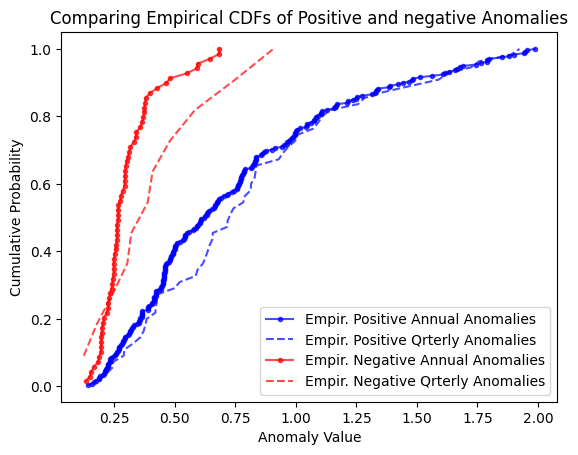

In [16]:
qrtr_tot_neg = np.sort(np.abs(qrtr_negative_values))
ann_tot_neg = np.sort(np.abs(ann_negative_values))
qrtr_tot_pos = np.sort(np.array(qrter_positive_values)[np.array(qrter_positive_values)<2])
ann_tot_pos = np.sort(np.array(ann_positive_values)[np.array(ann_positive_values)<2])

ann_pos_cum_prob = np.arange(1, len(ann_tot_pos) + 1) / len(ann_tot_pos)
ann_neg_cum_prob = np.arange(1, len(ann_tot_neg) + 1) / len(ann_tot_neg)
qrtr_pos_cum_prob = np.arange(1, len(qrtr_tot_pos) + 1) / len(qrtr_tot_pos)
qrtr_neg_cum_prob = np.arange(1, len(qrtr_tot_neg) + 1) / len(qrtr_tot_neg)

plt.plot(ann_tot_pos, ann_pos_cum_prob, marker='.', alpha=0.7, label='Empir. Positive Annual Anomalies', c='blue')
plt.plot(qrtr_tot_pos, qrtr_pos_cum_prob, alpha=0.7, label='Empir. Positive Qrterly Anomalies', c='blue', ls='--')

plt.plot(ann_tot_neg, ann_neg_cum_prob, marker='.', alpha=0.7, label='Empir. Negative Annual Anomalies', c= 'red')
plt.plot(qrtr_tot_neg, qrtr_neg_cum_prob, alpha=0.7, label='Empir. Negative Qrterly Anomalies', c= 'red', ls='--')

plt.legend()
plt.title('Comparing Empirical CDFs of Positive and negative Anomalies')
plt.xlabel('Anomaly Value')
plt.ylabel('Cumulative Probability')
plt.savefig('empirical_cdfs_q_ann.png')

In [17]:
from scipy.stats import ks_2samp

# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(qrtr_pos_cum_prob, ann_pos_cum_prob)

print('K-S statistic:', statistic)
print('P-value:', p_value)

# Interpretation
if p_value > 0.01:
    print('Fail to reject the null hypothesis - the distributions are not significantly different.')
else:
    print('Reject the null hypothesis - the distributions are significantly different.')


statistic, p_value = ks_2samp(ann_neg_cum_prob, qrtr_neg_cum_prob)

print('K-S statistic:', statistic)
print('P-value:', p_value)

# Interpretation
if p_value > 0.01:
    print('Fail to reject the null hypothesis - the distributions are not significantly different.')
else:
    print('Reject the null hypothesis - the distributions are significantly different.')


K-S statistic: 0.01810542398777693
P-value: 1.0
Fail to reject the null hypothesis - the distributions are not significantly different.
K-S statistic: 0.08959156785243742
P-value: 0.9999653742853718
Fail to reject the null hypothesis - the distributions are not significantly different.


KLD cannot be used due to the two CDFs having a different number of data points

### Comparing total imports vs exports anomalies for annual versus quarterly data:

In [23]:
ann_exp_anoms = []
ann_imp_anoms = []
for key in ann_gdp_anomalies:
    for i in range(3):
        ann_exp_anoms.extend(np.array(ann_gdp_anomalies[key]['exp_anomalies'][i]))
        ann_imp_anoms.extend(np.array(ann_gdp_anomalies[key]['imp_anomalies'][i]))

In [24]:
qrtr_exp_anoms = []
qrtr_imp_anoms = []
for key in ann_gdp_anomalies:
    for i in range(3):
        qrtr_exp_anoms.extend(np.array(qrtr_gdp_anomalies[key]['exp_anomalies'][i]))
        qrtr_imp_anoms.extend(np.array(qrtr_gdp_anomalies[key]['imp_anomalies'][i]))

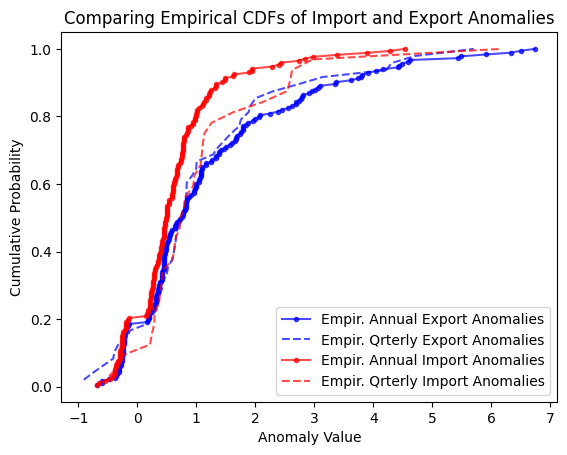

In [25]:
qrtr_exps = np.sort(qrtr_exp_anoms)[:-5]
ann_exps = np.sort(ann_exp_anoms)[:-25]
qrtr_imps = np.sort(qrtr_imp_anoms)
ann_imps = np.sort(np.array(ann_imp_anoms))[:-5]

ann_exp_cum_prob = np.arange(1, len(ann_exps) + 1) / len(ann_exps)
ann_imp_cum_prob = np.arange(1, len(ann_imps) + 1) / len(ann_imps)
qrtr_exp_cum_prob = np.arange(1, len(qrtr_exps) + 1) / len(qrtr_exps)
qrtr_imp_cum_prob = np.arange(1, len(qrtr_imps) + 1) / len(qrtr_imps)

plt.plot(ann_exps, ann_exp_cum_prob, marker='.', alpha=0.7, label='Empir. Annual Export Anomalies', c='blue')
plt.plot(qrtr_exps, qrtr_exp_cum_prob, alpha=0.7, label='Empir. Qrterly Export Anomalies', c='blue', ls='--')

plt.plot(ann_imps, ann_imp_cum_prob, marker='.', alpha=0.7, label='Empir. Annual Import Anomalies', c= 'red')
plt.plot(qrtr_imps, qrtr_imp_cum_prob, alpha=0.7, label='Empir. Qrterly Import Anomalies', c= 'red', ls='--')

plt.legend()
plt.title('Comparing Empirical CDFs of Import and Export Anomalies')
plt.xlabel('Anomaly Value')
plt.ylabel('Cumulative Probability')
plt.savefig('empirical_cdfs_q_ann_imp_exp.png')

In [27]:
statistic, p_value = ks_2samp(ann_imp_cum_prob, qrtr_imp_cum_prob)

print('K-S statistic:', statistic)
print('P-value:', p_value)

# Interpretation
if p_value > 0.01:
    print('Fail to reject the null hypothesis - the distributions are not significantly different.')
else:
    print('Reject the null hypothesis - the distributions are significantly different.')


statistic, p_value = ks_2samp(qrtr_exp_cum_prob, ann_exp_cum_prob)

print('K-S statistic:', statistic)
print('P-value:', p_value)

# Interpretation
if p_value > 0.01:
    print('Fail to reject the null hypothesis - the distributions are not significantly different.')
else:
    print('Reject the null hypothesis - the distributions are significantly different.')

K-S statistic: 0.030523255813953487
P-value: 0.999999999999999
Fail to reject the null hypothesis - the distributions are not significantly different.
K-S statistic: 0.020491803278688523
P-value: 1.0
Fail to reject the null hypothesis - the distributions are not significantly different.
